Merci de **ne pas modifier** le nom de ce notebook (même pour y inclure son nom).

Quelques conseils:
- pour exécutez une cellule, cliquez sur le bouton *Exécuter* ci-dessus ou tapez **Shift+Enter**
- si l'exécution d'une cellule prend trop de temps, sélectionner dans le menu ci-dessus *Noyau/Interrompre*
- en cas de très gros plantage *Noyau/Redémarrer*
- **sauvegardez régulièrement vos réponses** en cliquant sur l'icone disquette ci-dessus à gauche, ou *Fichier/Créer une nouvelle sauvegarde*

Pour répondre aux questions, remplacer les lignes ci-dessous par vos réponses: 
```python 
#LA REPONSE ICI
raise NotImplementedError()
``` 


---

# TD1: Révisions 

## Exercice 1: Oscillateurs et graphiques 1D/2D

On s’intéresse tout d’abord au mouvement à un seul degré
de liberté d’un point matériel de masse m=600g soumis à une force de rappel
élastique et à une force de frottement fluide. Le corps
n’est soumis à aucune autre force. Cette situation peut être
modélisée par l’équation différentielle du second ordre
suivante:
$$\ddot x (t) + 2\zeta \omega_0 \dot x (t) + \omega_0^2 x (t) = 0 $$ 

Dans cette relation, $\omega_0$ désigne une pulsation caractéristique
et $\zeta$ est une quantité positive sans dimension, appelée
taux d’amortissement.
Les conditions initiales sont notées :
$$ x(0) = x_0 $$
$$ \dot x(0)=v_0 $$

Q1 : Proposer un script complet qui donne
l’évolution temporelle de $x(t)$ pour différentes valeurs de
$\zeta$ avec $\omega_0=3~rad/s$. Ces valeurs seront choisies de manière à mettre en évidence
différents comportements oscillatoires. Les courbes seront tracées sur un même graphique.


In [4]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint

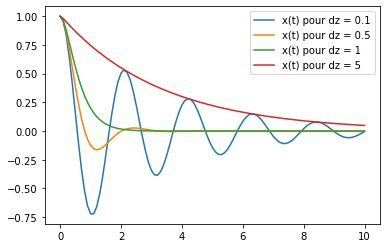

In [11]:
def oscil(Y,t,dz,w0):
    x, v = Y
    dydt = np.array([v, -2*dz*w0*v - w0**2 *x ])
    return dydt

y0 = [1, 0.0]
dz = [0.1, 0.5,1,5]
w0 = 3
t = np.linspace(0, 10, 101)

fig = plt.figure()

for z in dz :
    sol = odeint(oscil, y0, t, args=(z,w0))

    plt.plot(t, sol[:,0], label = f'x(t) pour dz = {z}')
plt.legend()
plt.show()


Q2 : Tracer le portrait de phase de l’oscillateur $(x(t), v(t))$ pour les valeurs différentes de $\zeta$ choisies ci-dessus.

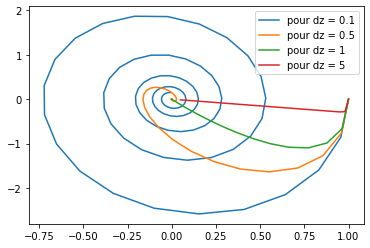

In [12]:
fig = plt.figure()

for z in dz :
    sol = odeint(oscil, y0, t, args=(z,w0))

    plt.plot(sol[:,0], sol[:,1], label = f'pour dz = {z}')
plt.legend()
plt.show()

Q3 : Pour une valeur non nulle de $\zeta$ choisie, tracer l'évolution temporelle de la position et la vitesse, le portrait de phase, l'énergie cinétique et potentielle. Le tout disposé dans une même fenêtre graphique sur deux lignes et deux colonnes.

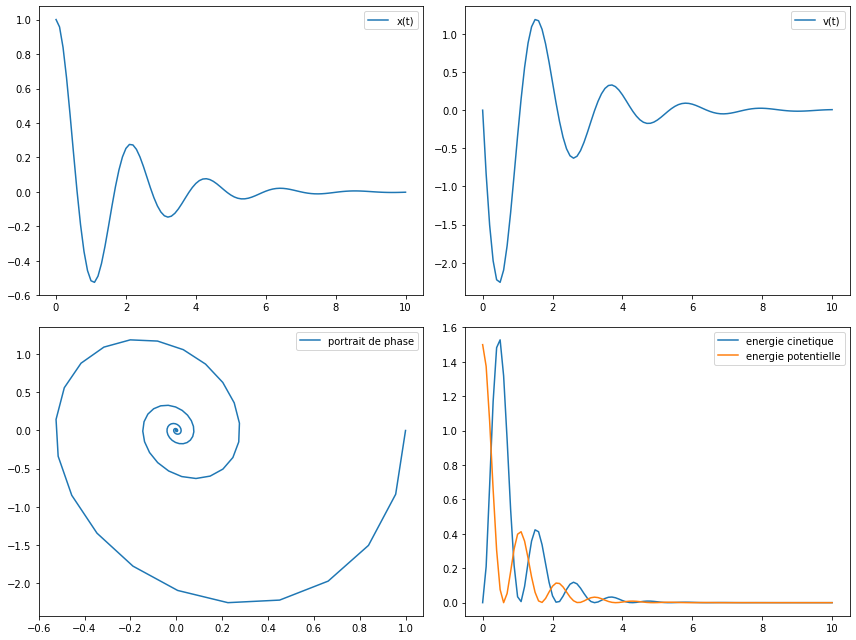

In [36]:
dz0 = 0.2
m= 0.6
def Ec(v) :
    return 0.5*m*v**2

def Ep(x):
    return 0.5* w0 * x**2



sol = odeint(oscil, y0, t, args=(dz0, w0))

fig = plt.figure(figsize = (12, 9))
plt.subplot(221)
plt.plot(t, sol[:,0], label = f'x(t)')
plt.legend()

plt.subplot(222)
plt.plot(t, sol[:,1], label = f'v(t)')
plt.legend()

plt.subplot(223)
plt.plot(sol[:,0], sol[:,1], label = f'portrait de phase')
plt.legend()

plt.subplot(224)
plt.plot(t, Ec(sol[:,1]), label = f'energie cinetique')
plt.plot(t, Ep(sol[:,0]), label = f'energie potentielle')
plt.legend()

plt.tight_layout()

plt.show()

Ici on va créer des fonctions semblables à la fonction meshgrid afin de tracer la surface des énergies mécaniques qui dépend à la fois de la position du point matériel et de sa vitesse. 

Q4 : Créer deux fonctions dont la première va prendre en paramètre le vecteur position de taille $n$ et le transformer en un tableau de dimension $m \times n$ (où $m$ est la taille du vecteur vitesse) de telle sorte que les $m$ **lignes** soient identiques au vecteur position. La deuxième fonction prend le vecteur vitesse de taille m et le transforme en un tableau de taille $m\times n$ de telle sorte que les $n$ **colonnes** seront identiques au vecteur vitesse. 


In [56]:
def X2 (x,v):
    n = len(x)
    m= len(v)
    X = np.zeros((m, n))
    for l in range(0,m):
        X[l]=x
    return X

def V2 (x,v):
    n = len(x)
    m= len(v)
    V = np.zeros((n, m))
    for l in range(0,n):
        V[l]=v
    V = np.transpose(V)
    return V

In [57]:
x= np.array([0,5,3])
v = np.array ([2,6])
X= X2(x,v)
V= V2(x,v)
print(X)
print(V)

[[0. 5. 3.]
 [0. 5. 3.]]
[[2. 2. 2.]
 [6. 6. 6.]]


Q5 : Sans utiliser la fonction meshgrid, et en se servant des tableaux générés par les fonctions definies ci-dessus, tracer la surface des énergies mécaniques qui dépend de la position et de la vitesse du point matériel.

<ipython-input-83-22dd5daffc49>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X,V,E)


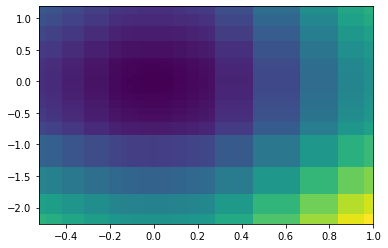

In [83]:
dz0 = 0.2
m= 0.6
def Ec(v) :
    return 0.5*m*v**2

def Ep(x):
    return 0.5* w0 * x**2

t = np.linspace(0, 10, 101)

sol = odeint(oscil, y0, t, args=(dz0, w0))
x= sol[:,0]
v= sol[:, 1]

X= X2(x,v)
V= V2(x,v)

E = Ec(V)+ Ep(X)

fig = plt.figure()
plt.pcolormesh(X,V,E)

plt.show()


## Exercice 2 : Position d'équilibre d'un pendule chargé


<img align="center" src="plots/pendule_charge.png" width="50%" />

Soit un pendule de masse $m$, de charge $q$ et de longueur de fil $\ell$. On place à proximité une seconde charge q', aux coordonnées $(x_q,z_q)$. L'énergie potentielle de gravitation du pendule peut s'écrire 

$$ V_g = mgz = -mg\ell \cos\theta$$ 
où $\theta$ est l'angle que le pendule fait avec la verticale. De même l'énergie potentielle électrostatique entre les deux charges s'écrit :

$$ V_e = \frac{1}{4\pi \epsilon_0} \frac{qq'}{\sqrt{(\ell\sin\theta - x_q)^2 + (\ell(1-\cos\theta)-z_q)^2}}$$ 

On sait que le minimum de la fonction est donné par l'annulation de sa dérivée première :

$$ \frac{\mathrm{d} V_e+V_g}{\mathrm{d} \theta} =0 $$

On obtient après quelques lignes de calcul :

$$ \sin \theta + \frac{qq'}{4\pi \epsilon_0 m g } \frac{x_q \cos\theta + (z_q - \ell)\sin \theta}{\left[(\ell\sin \theta - x_q)^2 + (\ell(1-\cos\theta)-z_q)^2\right]^{3/2}} = 0$$

ce qui n'est pas évident à résoudre analytiquement (enfin essayez si vous voulez...).

Résoudre cette équation par la méthode de minimisation de votre choix (dichotomie, Newton, etc). On posera $ c = \frac{qq'}{4\pi \epsilon_0 m g } $ et on tracera $\theta_0$ en fonction de $ c\in[-2,2] $, pour $\ell=1, x_q = 1, z_q=0$. On choisira judicieusement l'intervalle initial. La position d'équilibre suit-elle une loi conforme à ce qu'on s'attend intuitivement ?

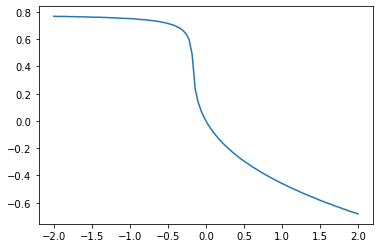

In [94]:
l=1
xq=1
zq=0

def blop(thet, l=1, Xq=1, Zq=0):
    num= Xq*np.cos(thet)+(Zq-l)*np.sin(thet)
    den= ((l*np.sin(thet)-Xq)**2 + (l*(1-np.cos(thet))-Zq)**2)**1.5
    return np.sin(thet)+c*num/den

#Dichotomie

def dichotomie(f,a,b,e):   #[a,b] intervalle, e precision
    while (b-a)>e :
        x=(a+b)/2
        y=f(x)
        
        if f(a)*y >0:
            a = x
        else : 
            b = x
    return x

C = np.linspace(-2,2,100)
thet0 = np.zeros(100)

for i in range(0,100) :
    c = C[i]
    thet0[i] = dichotomie(blop, -3, 3, 0.001)

fig = plt.figure()
plt.plot(C, thet0)
plt.show()
    


## Exercice 3: Temps de vie du muon

Le muon est une particule aux propriétés similaires à l'électron, mais près de 200 fois plus massive et donc instable. Le temps de vie du muon, $\tau_{\rm muon} = 2.1969811 \pm 0.000002\,\mu$s, caractérise sa désintégration en un électron. On peut mesurer en laboratoire le nombre de désintégration de muons, $N$, en fonction de l'intervalle de temps, $\Delta t$, entre l'entrée du muon dans le détecteur et l'émission de l'électron.

Le nombre de désintégration suit une loi de décroissance exponentielle en fonction de $\Delta t$ :
$$ f(t) = A\times \exp(-\Delta t/\tau)$$
On trace ci dessous les données et le modèle ajusté pour les meilleurs paramètres $A$ et $\Delta t$.

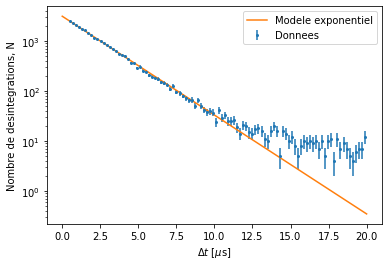

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


#Fonction d'ajustement
def fexp(Dt, A, tau):
    return A*np.exp(-Dt/tau)

#Charge les donnees
data = np.loadtxt("data/muon_binned.txt")
Dt_mesure = data[0] #x
N_mesure = data[1]  #y
eN_mesure = data[2] #erreur sur y

#Ajuste le modele
param0 = np.array([1000, 2.2])#initialisation de l'ajustement
p_opt, cov = curve_fit(fexp, Dt_mesure, N_mesure, param0, eN_mesure)

#Meilleurs parametres
A_opt = p_opt[0]
tau_opt = p_opt[1]

#Affichage
Dt_plot = np.linspace(0,20,100)#pour tracer le modele

fig = plt.figure()
plt.errorbar(Dt_mesure, N_mesure, yerr=eN_mesure, linestyle='', marker='o', markersize=2, label = "Donnees")
plt.plot(Dt_plot, fexp(Dt_plot, A_opt, tau_opt), label="Modele exponentiel")
plt.xlabel(r"$\Delta t$ [$\mu$s]")
plt.ylabel("Nombre de desintegrations, N")
plt.yscale("log")
plt.legend()
plt.show()

Manifestement le modèle ne reproduit pas les données à haut $\Delta t$. Les mesures sont en effet affectées par un bruit de fond constant en fonction de $\Delta t$.

- Ajuster un modèle $g(t) = A\times \exp(-\Delta t/\tau) + B$ aux données.
- Superposer le meilleur modèle avec bruit de fond au graphique précédent.

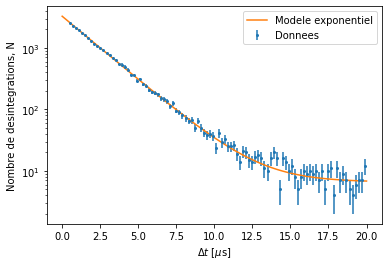

In [101]:
#Fonction d'ajustement
def fexp2(Dt, A, B, tau):
    return A*np.exp(-Dt/tau) + B

#Ajuste le modele
param0 = np.array([1000, 0, 2.2])#initialisation de l'ajustement
p_opt, cov = curve_fit(fexp2, Dt_mesure, N_mesure, param0, eN_mesure)

#Meilleurs parametres
A_opt = p_opt[0]
B_opt = p_opt[1]
tau_opt = p_opt[2]

#Affichage
Dt_plot = np.linspace(0,20,100)#pour tracer le modele

fig = plt.figure()
plt.errorbar(Dt_mesure, N_mesure, yerr=eN_mesure, linestyle='', marker='o', markersize=2, label = "Donnees")
plt.plot(Dt_plot, fexp2(Dt_plot, A_opt, B_opt, tau_opt), label="Modele exponentiel")
plt.xlabel(r"$\Delta t$ [$\mu$s]")
plt.ylabel("Nombre de desintegrations, N")
plt.yscale("log")
plt.legend()
plt.show()

- Affichez le temps de vie du muon et l'incertitude associée.

In [98]:
print(f'Le temps de désintégration du muon est de {tau_opt}+- {cov[2,2]} µs')

Le temps de désintégration du muon est de 2.1034739215368+- 0.00017216619408667804 µs


Les muons peuvent être capturés par un noyau atomique en remplaçant momentanément un électron du détecteur, ce qui affecte le temps de vie mesuré de la façon suivante :
$$ \frac{1}{\tau_{\rm muon}} = \frac{1}{\tau} - \frac{1}{\tau_{\rm capture}} $$
où le temps de capture effectif vaut $\tau_{\rm capture} = 65 \pm 4\,\mu$s.

- Commentez l'accord du temps de vie obtenu en prenant le bruit de fond en compte avec la valeur attendue.

In [105]:
tau_c = 65
sig_tau_c = 4
tau_m = 1/(1/tau_opt - 1/tau_c)

sig_tau_m = 1/(1/tau_opt - 1/(tau_c-4)) - 1/(1/tau_opt - 1/(tau_c+4))

print(tau_m)
print(sig_tau_m)



2.1738212493536926
0.008984026127569322


LA REPONSE ICI (double-clique pour editer la cellule)

## Exercice 4 :  Tracé et calcul de l'aire d'une ellipse par méthode Monte-Carlo

Une ellipse est définie peut être définie par la taille de ces deux axes suivant des axes ortogonaux $x$ (demi-axe $a$) et $y$ (demi-axe $b$). L'ellipse vérifie alors:
$$ \left(\frac{x}{a}\right)^2 + \left(\frac{y}{b}\right)^2 =1$$ 

On peut alors tracer l'ellipse de manière paramétrique de la façon suivante :

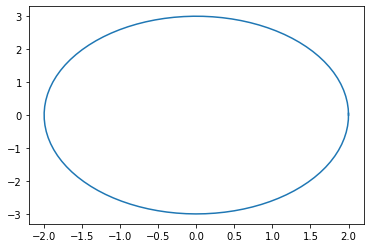

In [107]:
a=2
b= 3
theta = np.linspace(0,2*3.15, 100)
x= a*np.cos(theta)
y= b*np.sin(theta)

fig= plt.figure()
plt.plot(x,y)
plt.show()

Tirez, de manière aléatoire selon une distribution uniforme, des points dans le plan $(x,y)$ dans une gamme au moins aussi large que l'aire couverte par l'ellipse. Tracez ces points avec des petites croix vertes par dessus l'ellipse.

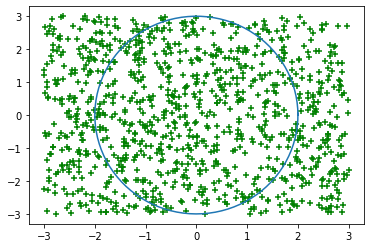

In [113]:
rand = np.random.uniform(-3,3,(2,1000))

fig= plt.figure()
plt.plot(x,y)
plt.scatter(rand[0],rand[1], marker='+', c='g')
plt.show()

Établissez un critère mathématique pour déterminer si un point est à l'intérieur de l'ellipse et indiquez respectivement par des croix vertes et rouges les points à l'intérieur et à l'extérieur de l'ellipse.

In [ ]:


if rand[0]**2/a + rand[1]**2/b <= 1 :
    

Calculer l'aire de l'ellipse par intégration Monte-Carlo en utilisant $10^4$ points et comparez à la valeur analytique attendue.

In [ ]:
#LA REPONSE ICI
raise NotImplementedError()

## Exercice 5: traitement d'images et convolution

L'objectif de cet exercice est d'aborder le traitement d'images à l'aide de fonctions simples de manipulation d'un tableau 2D. On commence tout d'abord par ouvrir une image de la nébuleuse NGC5307 `data/ngc5307.fits` depuis le répertoire du cours. Exécuter la cellule suivante pour ouvrir et charger l'image sous forme de tableau `numpy`.

In [ ]:
import astropy.io.fits as pyfits
a = pyfits.open('data/ngc5307.fits')[0].data[0]
print(a.shape, type(a))

- A l'aide de la fonction `imshow` représenter le tableau `a`. On choisira une figure de taille (12,12) à l'aide de l'argument figsize de `figure`:

```fig = plt.figure(figsize=(12,12))```

In [ ]:
#LA REPONSE ICI
raise NotImplementedError()

- L'image ainsi représentée est très peu contrastée. Pour corriger cela, on souhaite maintenant tracer son logarithme, mais `a` contient des valeurs négatives.
Commencer par faire une copie du tableau `a`, qu'on appelera `a2`. Rechercher la plus petite valeur positive de `a`, qu'on appelera "mini", puis remplacer toutes les valeurs négatives ou nulles de `a2` par "mini".

**Bonus:** explorez la syntaxe décrite ici https://www.python-course.eu/numpy_masking.php, la réponse à cette question peut tenir en deux lignes très simples !

In [ ]:
#LA REPONSE ICI
raise NotImplementedError()

- Représenter le logarithme en base 10 de `a2`. **Dans toute la suite on représentera le logarithme en base 10 des tableaux.**

In [ ]:
#LA REPONSE ICI
raise NotImplementedError()

- On souhaite se débarasser des marges. Rogner le tableau `a2` d'un nombre de lignes et colonnes pertinent et sauvegarder le résultat dans un tableau `a3`. Représenter `a3`.

In [ ]:
#LA REPONSE ICI
raise NotImplementedError()

L'image est très bruitée. Sur le tableau `a` initial, évaluons le niveau de bruit sur une sous-portion de l'image. 

- Pour cela extraire un sous tableau de `a` qui ne contient a priori que du bruit, le transformer en vecteur 1D avec la méthode `.flatten()` et le repésenter sous la forme d'un histogramme. On définit le niveau de bruit par l'écart type des valeurs des pixels bruités, la calculer.

In [ ]:
#LA REPONSE ICI
raise NotImplementedError()

- Créer un tableau `a4`, copie de `a3`, et remplacer tous les pixels dont la valeur est inférieure à deux fois le niveau de bruit par la valeur 1. Représenter `a4`. Pour avoir plus de contraste visuel utiliser une autre échelle de couleur avec l'argument `cmap='jet'` dans `imshow`.

In [ ]:
#LA REPONSE ICI
raise NotImplementedError()

- L'étoile centrale de la nébuleuse planétaire est très brillante et écrase la dynamique des couleurs, mais on peut la masquer. Pour cela à l'aide des fonctions [`argmax`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) et [`unravel_index`](https://numpy.org/doc/stable/reference/generated/numpy.unravel_index.html#numpy.unravel_index) (voir documentation en ligne), déterminer la position `(xmax,ymax)` de l'étoile centrale en recherchant le pixel le plus brillant.

In [ ]:
#LA REPONSE ICI
raise NotImplementedError()

- Créer un tableau `a5` copie de `a4`. Dans ce tableau, remplacer toutes les valeurs dans un disque de rayon 10 pixels autour de l'étoile centrale par des NaN `np.nan`. Cela permet de masquer l'étoile centrale. Représenter `a5` et apprécier les progrès par rapport à `a` !

In [ ]:
#LA REPONSE ICI
raise NotImplementedError()

- On cherche maintenant à calculer le gradient de l'image, pour repérer les forts contrastes de densité dans la nébuleuse (dus à des ondes de choc dans le gaz par exemple). Pour, cela un choix naturel est de calculer le gradient de l'image. A l'aide la fonction `scipy.signal.convolve2d` et d'un noyau de convolution bien choisi, calculer le gradient de l'image selon x, selon y et réaliser un graphique avec la norme du vecteur gradient ainsi calculé. Que constatez-vous ?

In [ ]:
#LA REPONSE ICI
raise NotImplementedError()

- On ne distingue pas grand chose dans l'image, du fait qu'elle assez bruitée: le gradient ne révèle que le bruit de pixel à pixel. Pour retirer le bruit, il faut nécessairement perdre en résolution. Recommencer le calcul et la représentation du gradient, mais cette fois appliquer avant alternativement un filtre de moyennage (avec un noyau de la taille qui vous semble approprié), et un filtre gaussien à l'aide de `scipy.signal.convolve2d`, et un filtre médian et avec `scipy.signal.medfilt2d`.

In [ ]:
#LA REPONSE ICI
raise NotImplementedError()

- Commenter le choix des tailles de noyaux, et de l'intérêt respectif de chacun des filtres.

LA REPONSE ICI (double-clique pour editer la cellule)